In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape images to fit the CNN input requirement
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


11490434/11490434 [==============================] - 19s 2us/step


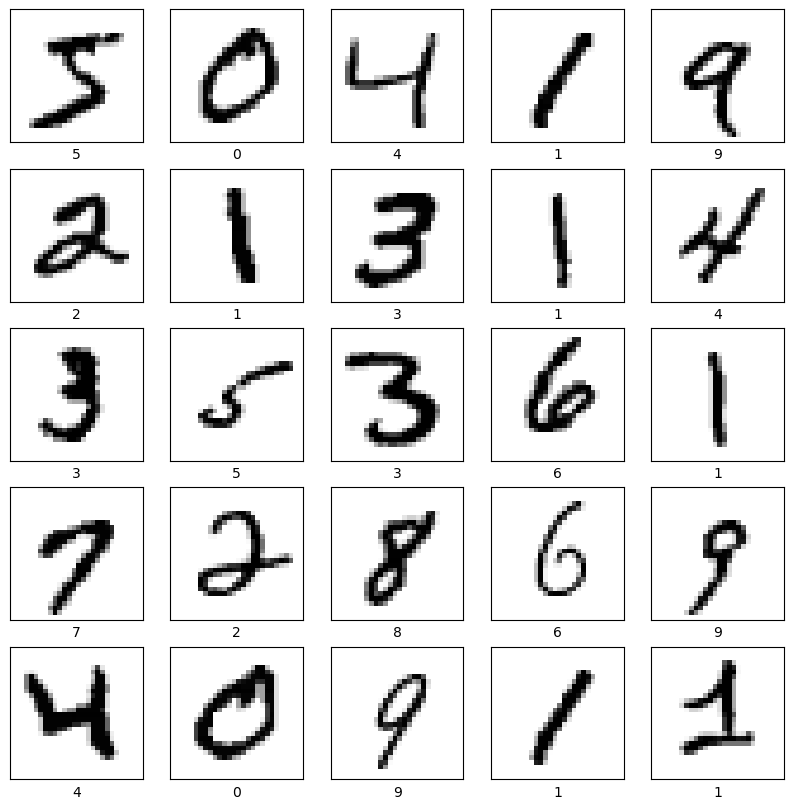

In [2]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Define here the CNN

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2163 - accuracy: 0.9371 - val_loss: 0.0834 - val_accuracy: 0.9734
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0749 - accuracy: 0.9769 - val_loss: 0.0610 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.0395 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0379 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0542 - val_accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0349 - val_ac

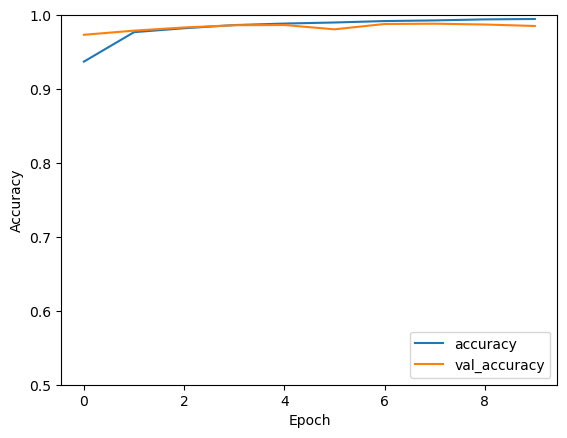

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()